In [2]:
# Importing libraries.
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Function to read data based on file extension.
def read_data(file_path):
    _ , file_ext = os.path.splitext(file_path)
    if file_ext == '.csv':
        return pd.read_csv(file_path)
    elif file_ext == '.json':
        return pd.read_json(file_path)
    elif file_ext in ['.xls', '.xlsx']:
        return pd.read_excel(file_path)
    else:
        raise ValueError("Unknown file format")

In [4]:
# Reading the dataset.
file_path = "predictive_maintenance.csv"
df = read_data(file_path)
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [5]:
df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,No Failure


In [6]:
# Shape of the data.
df.shape

(10000, 10)

In [7]:
# Data information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [8]:
# Describing the data.
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [9]:
# Converting columns to list.
df.columns.tolist()

['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target',
 'Failure Type']

In [10]:
# Missing values.
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [11]:
# Checking duplicate values.
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [24]:
# Dropping 'UDI' and 'Product ID' columns.
df.drop(columns=['UDI', 'Product ID'], axis=1, inplace=True)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


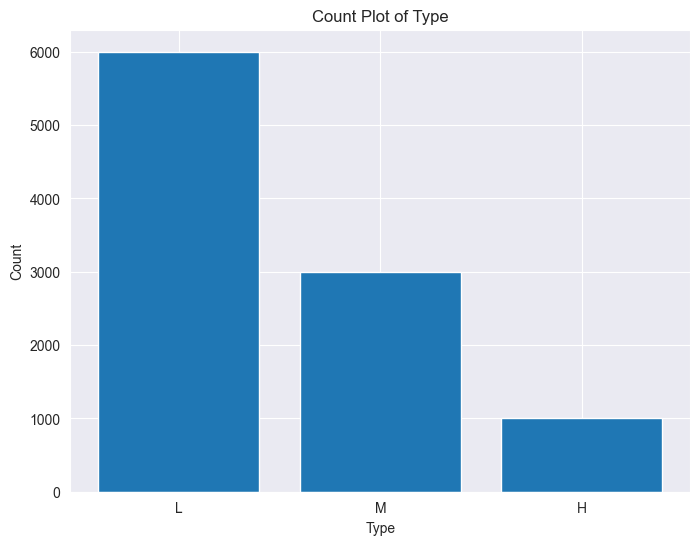

In [25]:
# Calculating 'Type' counts.
type_counts = df['Type'].value_counts()

# Using Matplotlib to create a count plot. 
plt.figure(figsize=(8, 6)) 
plt.bar(type_counts.index, type_counts) 
plt.title('Count Plot of Type') 
plt.xlabel('Type') 
plt.ylabel('Count') 
plt.show() 

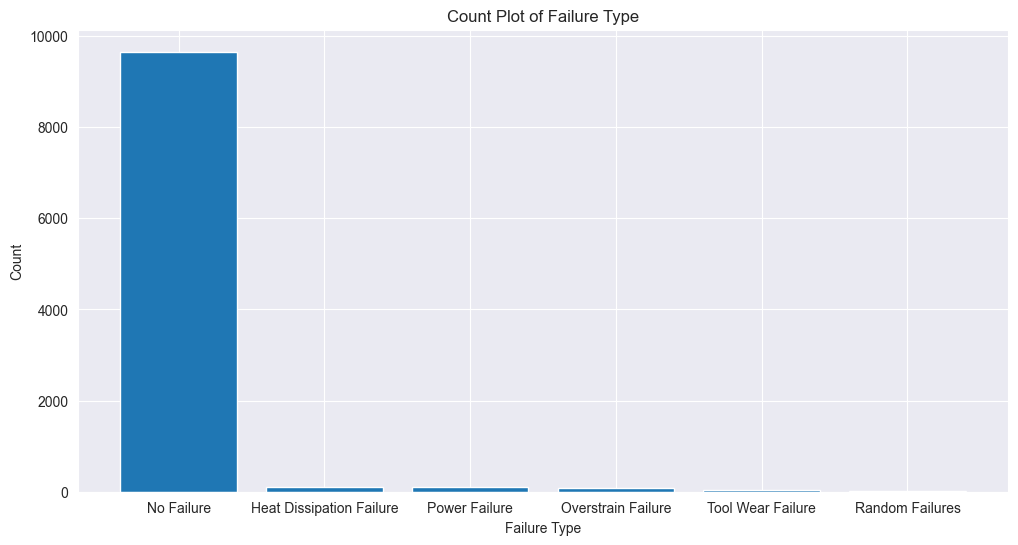

In [26]:
# Calculating ' Failure Type' counts.
failure_type_counts = df['Failure Type'].value_counts()

# Using Matplotlib to create a count plot. 
plt.figure(figsize=(12, 6)) 
plt.bar(failure_type_counts.index, failure_type_counts) 
plt.title('Count Plot of Failure Type') 
plt.xlabel('Failure Type') 
plt.ylabel('Count') 
plt.show()


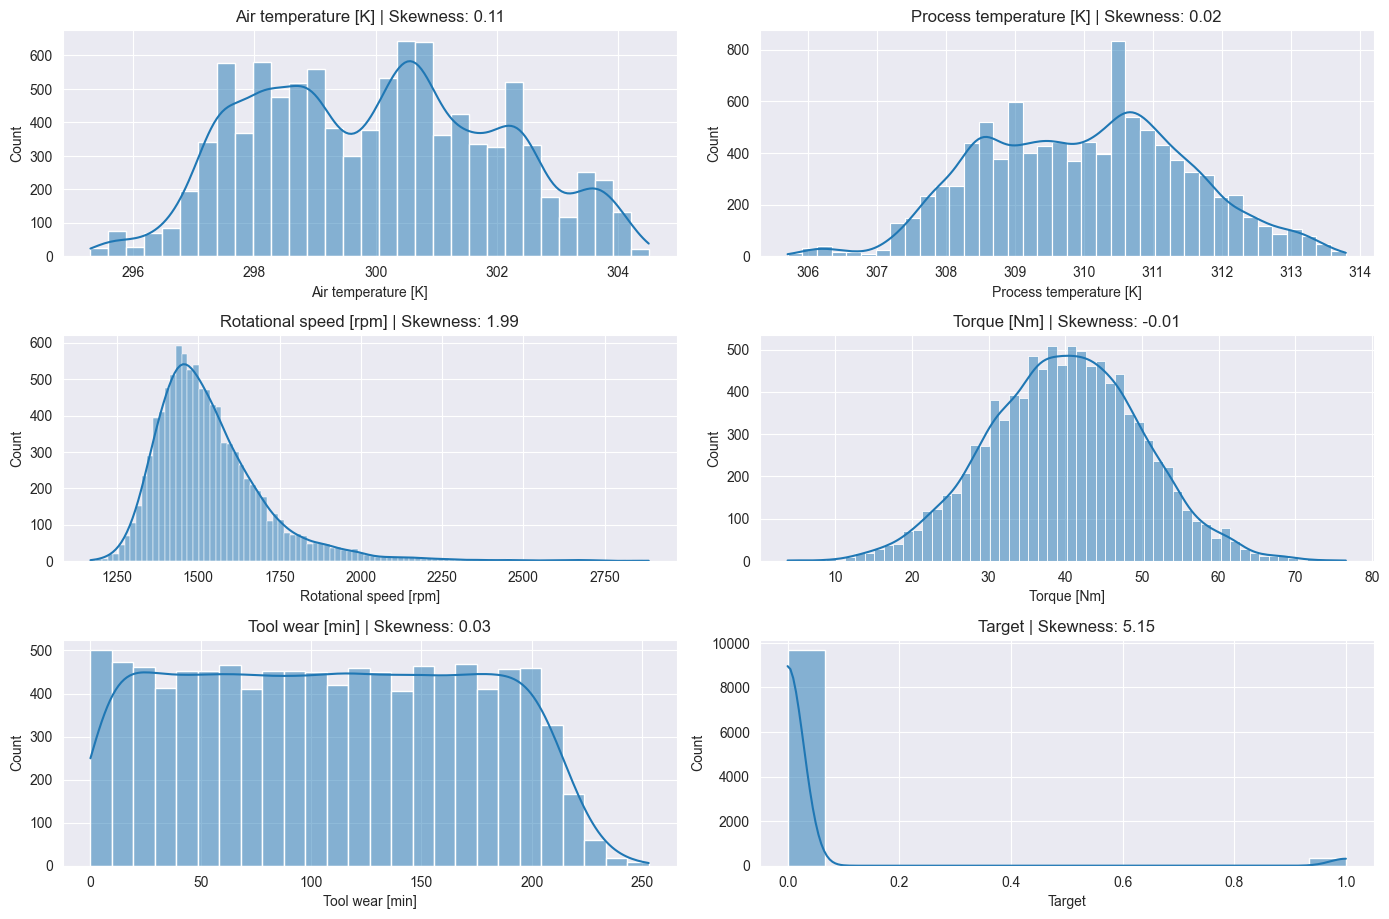

In [27]:
# Setting out seaborn style.
sns.set_style('darkgrid')

# Identifying numerical columns.
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns 
  
# Plotting distribution of each numerical feature. 
plt.figure(figsize=(14, len(numerical_columns) * 3)) 
for idx, feature in enumerate(numerical_columns, 1): 
    plt.subplot(len(numerical_columns), 2, idx) 
    sns.histplot(df[feature], kde=True) 
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}") 
  
# Adjusting layout and showing plots. 
plt.tight_layout() 
plt.show() 

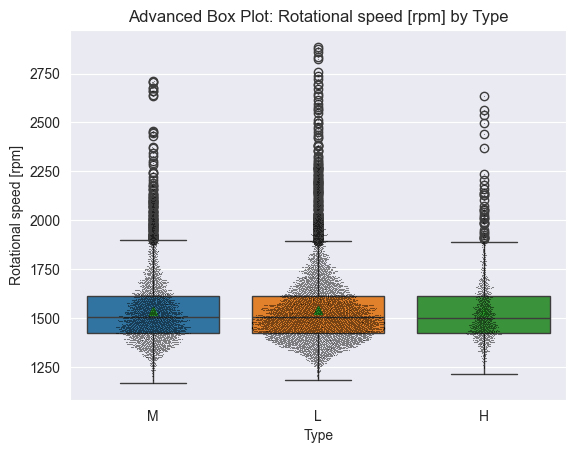

In [28]:
# Advanced Boxplots 
sns.boxplot(data=df, x='Type', y='Rotational speed [rpm]', showmeans=True, hue='Type')
sns.swarmplot(data=df, x='Type', y='Rotational speed [rpm]', color='black', alpha=0.5, size=0.8)  # Overlay datapoints
plt.title("Advanced Box Plot: Rotational speed [rpm] by Type")
plt.show()

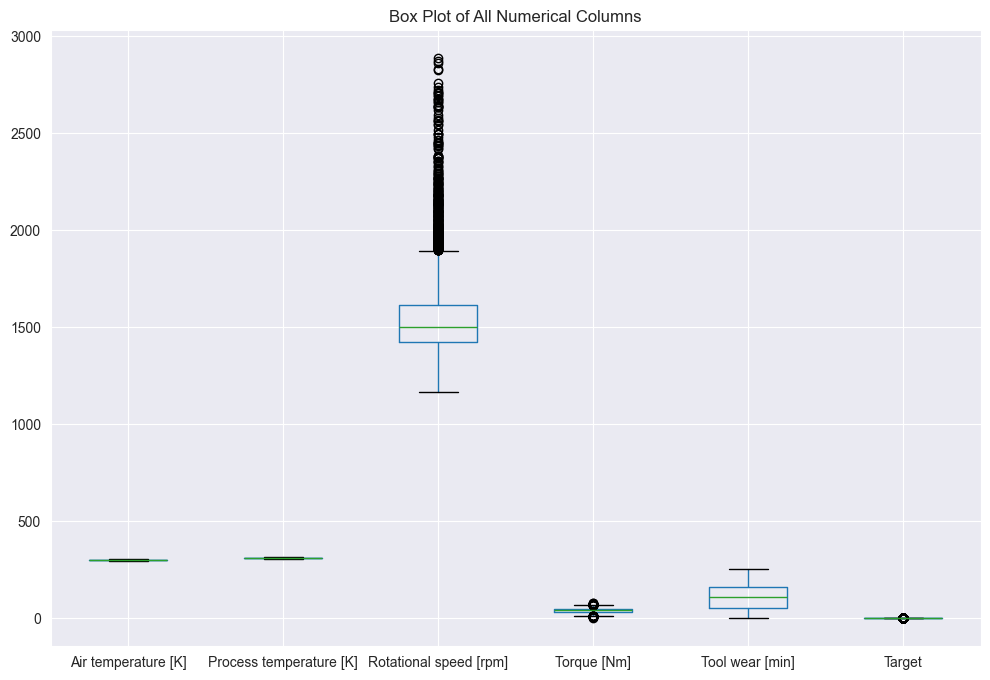

In [38]:
# Checking outliers for all other numerical columns.
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Box Plot of All Numerical Columns')
plt.show()

In [40]:
# Handlling outliers in 'Rotational speed' column using winsorization.
rotational_q1 = df['Rotational speed [rpm]'].quantile(0.25)

rotational_q3 = df['Rotational speed [rpm]'].quantile(0.75)

rotational_iqr = rotational_q3 - rotational_q1

rotational_lower_bound = rotational_q1 - 1.5 * rotational_iqr

rotational_upper_bound = rotational_q3 + 1.5 * rotational_iqr

df['Rotational speed [rpm]'] = np.where(df['Rotational speed [rpm]'] < rotational_lower_bound, rotational_lower_bound,
                        np.where(df['Rotational speed [rpm]'] > rotational_upper_bound, rotational_upper_bound, df['Rotational speed [rpm]']))

In [ ]:
# Handlling outliers in 'Rotational speed' column using winsorization.
rotational_q1 = df['Rotational speed [rpm]'].quantile(0.25)

rotational_q3 = df['Rotational speed [rpm]'].quantile(0.75)

rotational_iqr = rotational_q3 - rotational_q1

rotational_lower_bound = rotational_q1 - 1.5 * rotational_iqr

rotational_upper_bound = rotational_q3 + 1.5 * rotational_iqr

df['Rotational speed [rpm]'] = np.where(df['Rotational speed [rpm]'] < rotational_lower_bound, rotational_lower_bound,
                        np.where(df['Rotational speed [rpm]'] > rotational_upper_bound, rotational_upper_bound, df['Rotational speed [rpm]']))

In [42]:
# Handlling outliers in 'Torque [Nm]' column using winsorization.
torque_q1 = df['Torque [Nm]'].quantile(0.25)

torque_q3 = df['Torque [Nm]'].quantile(0.75)

torque_iqr = torque_q3 - torque_q1

torque_lower_bound = torque_q1 - 1.5 * torque_iqr

torque_upper_bound = torque_q3 + 1.5 * torque_iqr

df['Torque [Nm]'] = np.where(df['Torque [Nm]'] < torque_lower_bound, torque_lower_bound,
                        np.where(df['Torque [Nm]'] > torque_upper_bound, torque_upper_bound, df['Torque [Nm]']))

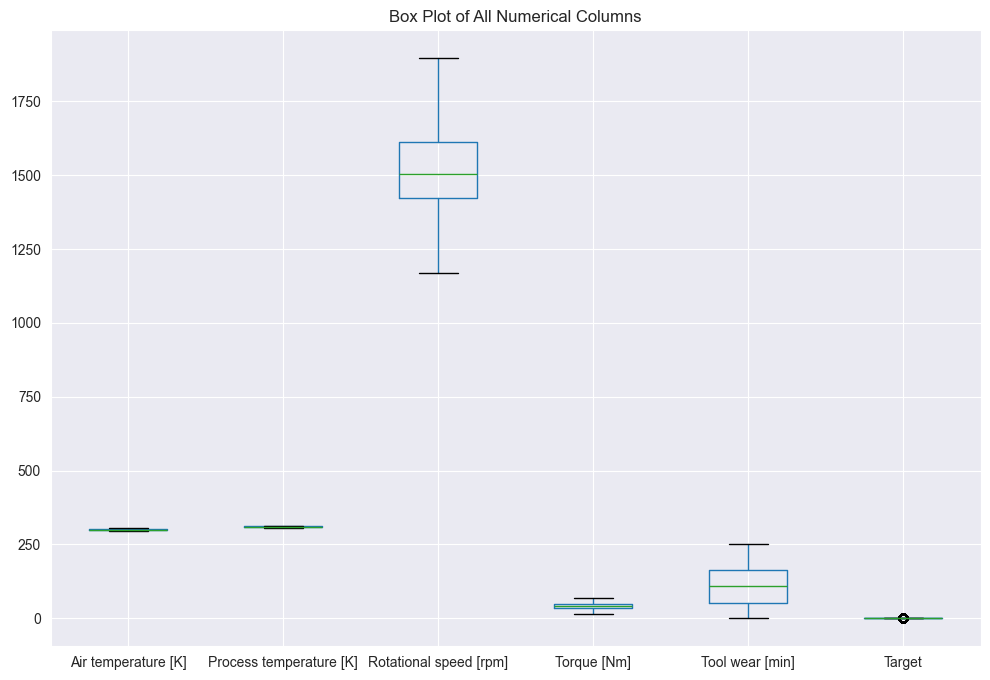

In [43]:
# Checking outliers for all other numerical columns again.
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Box Plot of All Numerical Columns')
plt.show()

<Figure size 1000x1000 with 0 Axes>

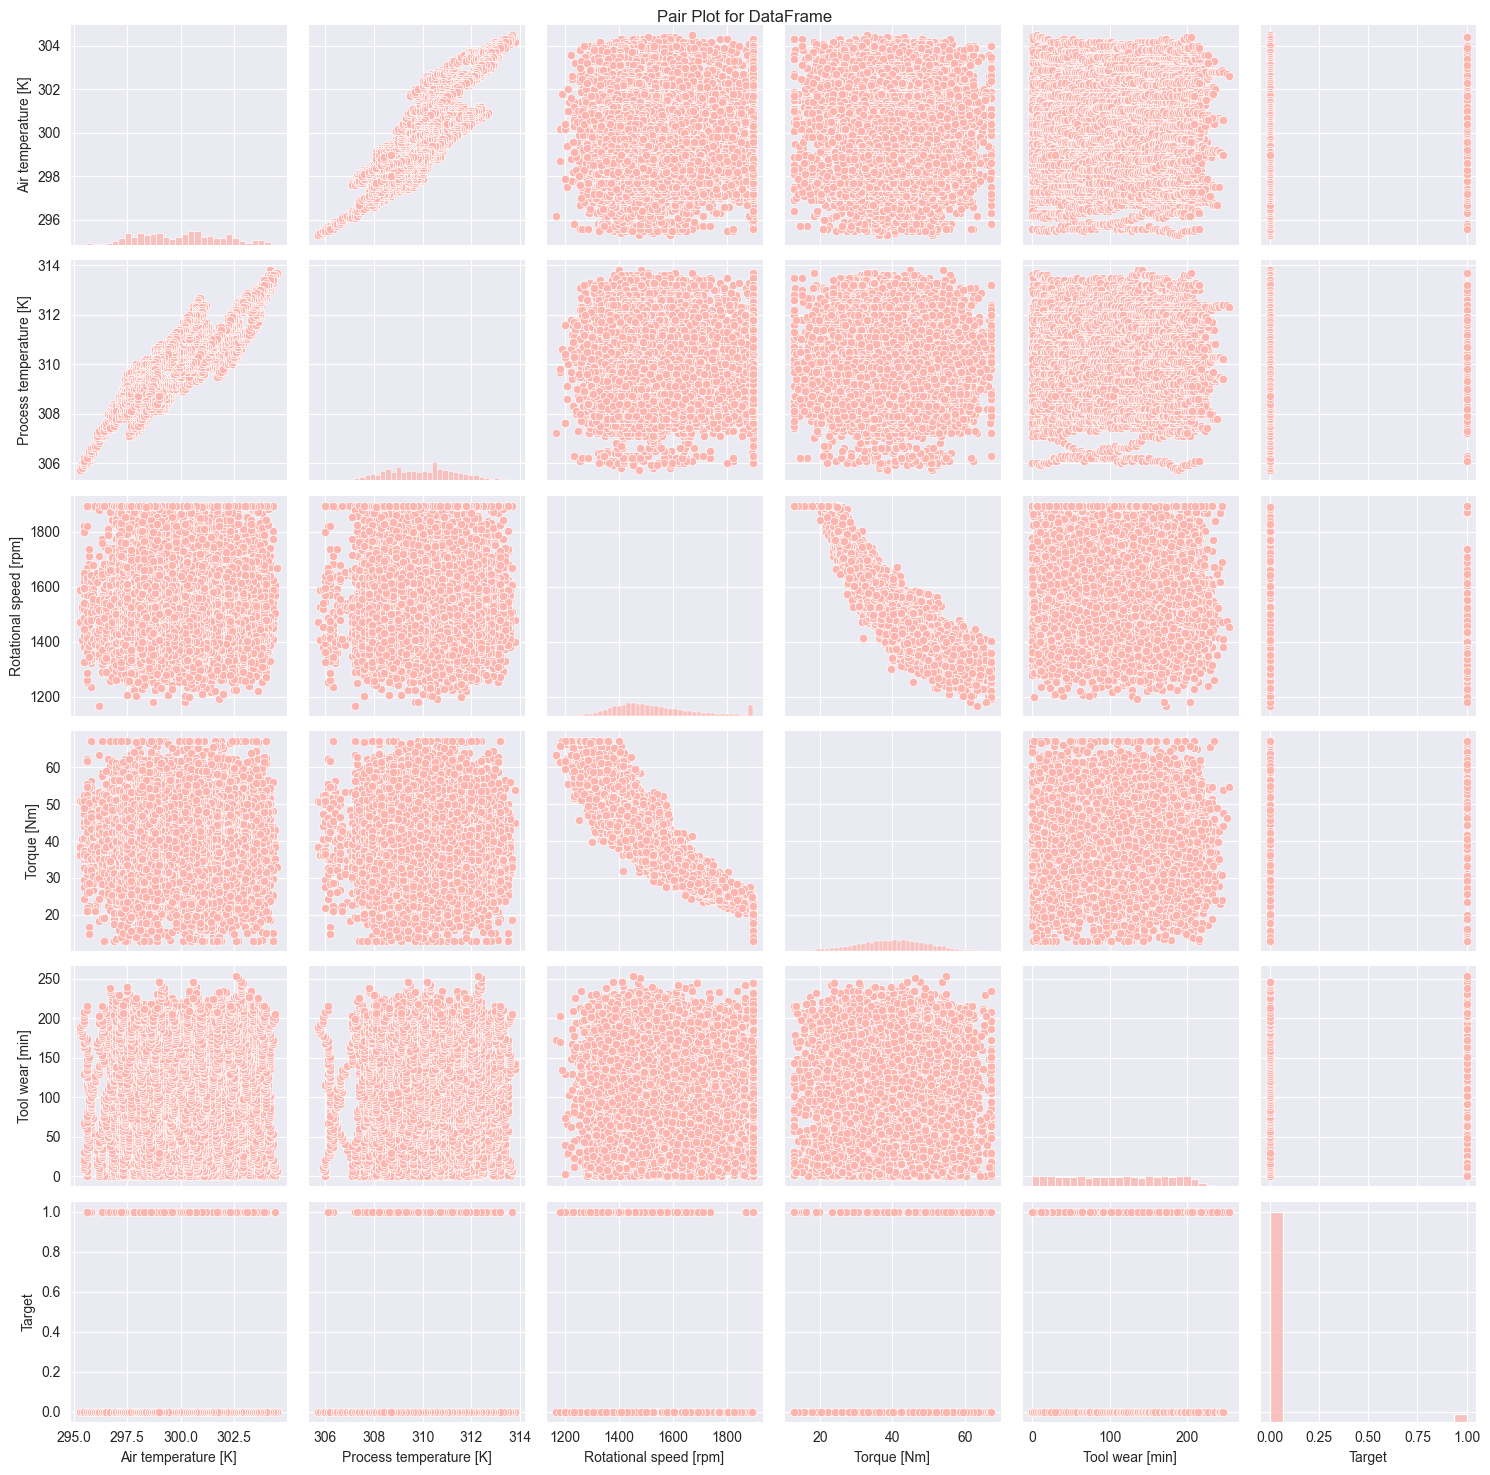

In [48]:
# Using Seaborn to create a pair plot.   
plt.figure(figsize=(10, 10)) 
sns.pairplot(df) 
plt.suptitle('Pair Plot for DataFrame')
plt.tight_layout()
plt.show() 

In [51]:
# Exploring unique values in the 'Failure Type' column.
df['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)